# Why people wash meat (or don't) 

YouTuber (and former public radio reporter) [Adam Ragusea](https://www.youtube.com/user/aragusea/about) [asked his viewers](https://youtu.be/U_PMnCpaJiQ?t=742) in September 2020 to answer a detailed survey about whether (and why and how) they wash meat before cooking it. He received more than 13,000 responses. The data explored and analyzed here is the anomymized data collected. Ragusea published a [video](https://www.youtube.com/watch?v=90Nd_vh3yk8) explaining more around washing meat and his analysis of the data.

[USDA Study: Food Safety Consumer Research Project: Meal Preparation Experiment Related to Poultry Washing](https://www.fsis.usda.gov/wps/wcm/connect/9bb3a252-e12e-40e5-b76b-cb46a2322c3f/FSCRP_Year+2_Final_Aug2019.pdf?MOD=AJPERES) - Published: August 2019

["Don't Wash Your Chicken!" Results of an Interdiciplinary Approach to Reduce Incidence of Infectious Foodborne Diseases](https://idea.library.drexel.edu/islandora/object/idea%3A4369/datastream/OBJ/view) - December 2013

<i>Due to the nature of how this data was gathered this was NOT a random sample. Therefore results, analyses, conclusions, and insights should be treated as such. </i>


In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [200]:
df_survey = pd.read_csv('data/RaguseaMeatWashingSurveyResponsesRaw.csv')

df_survey.head()

/Users/bryandunn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,10,11,27,28,29,30,31,32,34,35,36,37,38,39,40,52,53,54,55,56,57,63,64,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Timestamp,Do you prepare meat for yourself or others ?,What is your current age?,What is your gender ? (Self-describe using 'other.'),Identify your country or territory of origin,Identify your current country or territory of residency,Current U.S. state of residence,"What is your ""race""? (Categories are those used by the U.S. Census Bureau — check all that apply.)","Are you of Hispanic, Latino, or Spanish origin?",How often do you prepare a meal in your household?,How many people are in your household?,How important is food safety to you when you cook?,"Which of the following do you do regularly when cooking, preparing and consuming food products? (Check all that apply)","Before you begin to prepare food in your kitchen, how often do you wash your hands with soap and warm water for at least 20 seconds?",Please indicate how often you do each of the following [Use different plates for handling raw meat and cooked meat],"Please indicate how often you do each of the following [Use a food thermometer to check the doneness for red meat, pork or poultry]",Please indicate how often you do each of the following [Not wash utensils used to handle raw food before they are used for cooked food],Please indicate how often you do each of the following [Use the same cutting board without cleaning it with hot soapy water between using it for raw meat or chicken and using it for ready-to-eat food],Please indicate how often you do each of the following [Leave perishable food out of the refrigerator for more than two hours],"For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Pork (pigs)]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Poultry (chicken, turkey, duck, any other bird)]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Beef (cattle or buffalo)]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Sheep (lamb) or goat]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Fish (marine, fresh water, finned, shellfish, etc.)]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Ground meat]","For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Other]","If you said ""other,"" please explain.","If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I feel like I should 

In [201]:
df_survey.shape

(13528, 68)

<div class="alert alert-block alert-warning">

<b>Tidiness Issue #1:</b> Column names often contain full sentences of the questions from the survey. 

SOLUTION: Column names are renamed to more concise title. 
    </div>

In [202]:
# rename 'tweet_id' to 'id' in twitter_archive
df_survey.rename(columns={'Timestamp' : 'timestamp',
                          'Do you prepare meat for yourself or others ?' : 'prepare_meat', 
                          'What is your current age? ' : 'age', 
                          "What is your gender ? (Self-describe using 'other.')" : 'gender', 
                          'Identify your country or territory of origin' : 'country_origin',
                          'Identify your current country or territory of residency' : 'country_residency',
                          'Current U.S. state of residence ' : 'us_state_residency',
                          'What is your "race"? (Categories are those used by the U.S. Census Bureau — check all that apply.)' : 'race',
                          'Are you of Hispanic, Latino, or Spanish origin?' : 'hispanic',
                          'How often do you prepare a meal in your household?' : 'times_prepare_meal',
                          'How many people are in your household?' : 'household_size',
                          'How  important is food safety to you when you cook?' : 'importance_food_safety_cooking',
                          'Which of the following do you do regularly when cooking, preparing and consuming food products? (Check all that apply)' : 'follow_when_cooking',
                          'Before you begin to prepare food in your kitchen, how often do you wash your hands with soap and warm water for at least 20 seconds?' : 'often_wash_hands',
                          'Please indicate how often you do each of the following [Use different plates for handling raw meat and cooked meat]' : 'often_different_plates',
                          'Please indicate how often you do each of the following [Use a food thermometer to check the doneness for red meat, pork or poultry]' : 'often_thermometer',
                          'Please indicate how often you do each of the following [Not wash utensils used to handle raw food before they are used for cooked food]' : 'often_not_wash_utensils',
                          'Please indicate how often you do each of the following [Use the same cutting board without cleaning it with hot soapy water between using it for raw meat or chicken and using it for ready-to-eat food]' : 'often_not_wash_cutting_board',
                          'Please indicate how often you do each of the following [Leave perishable food out of the refrigerator for more than two hours]' : 'often_leave_food_2hrs',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Pork (pigs)]' : 'wash_pork',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Poultry (chicken, turkey, duck, any other bird)]' : 'wash_poultry', 
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Beef (cattle or buffalo)]' : 'wash_beef',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Sheep (lamb) or goat]' : 'wash_lamb_goat',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Fish (marine, fresh water, finned, shellfish, etc.)]' : 'wash_fish',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Ground meat]' : 'wash_ground_meat',
                          'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.) [Other]' : 'wash_other',
                          'If you said "other," please explain.' : 'wash_other_comments',
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I feel like I should wash the meat, but I don’t.]' : "donot_rank_should",
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I believe the meat is already clean enough.]' : "donot_rank_clean_enough",
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’ve heard some food safety experts recommend against washing meat.]' : 'donot_rank_warn_against',
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I want to preserve the taste, smell, texture or appearance of the meat.]' : 'donot_rank_preserve',
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [It is not a cultural or religious custom or tradition for me.]' : 'donot_rank_cultural',
                          'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [Other]' : 'donot_rank_other',
                          'If you said "other," please explain..1' : 'donot_rank_other_comments',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m concerned about the health and safety of the meat.]' : 'do_rank_health',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m acting in accordance with a religious belief or practice.]' : 'do_rank_religious',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m following a non-religious custom or tradition.]' : 'do_rank_nonreligious',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m trying to improve the taste or smell of the meat.]' : 'do_rank_taste',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m trying to improve the texture of the meat.]' : 'do_rank_texture',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [I’m trying to improve the appearance of the meat.]' : 'do_rank_appearance',
                          'If you do commonly wash any raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.) [Other]' : 'do_rank_other',
                          'If you said "other," please explain..2' : 'do_rank_other_comments',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Pathogens (bacteria, viruses, fungi, etc.)]' : 'do_rank2_pathogens',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Artificial chemicals (preservatives, pesticides, cleaning solutions, etc.)]' : 'do_rank2_chemicals',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Inedible debris (dirt, dust, bone fragments, feathers, etc.)]' : 'do_rank2_debris',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Undesirable flavors or odors]' : 'do_rank2_flavors',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Blood]' : 'do_rank2_blood',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Slime]' : 'do_rank2_slime',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Fat]' : 'do_rank2_fat',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Meat juice (the pink, non-blood liquid that comes out of muscle tissue)]' : 'do_rank2_meat_juice',
                          'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.) [Other]' : 'do_rank2_other',
                          'If you said "other," please explain..3' : 'do_rank2_other_comments',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Rinsing under running water]' : 'do_rank3_running_water',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Rinsing in a bowl or basin of plain water]' : 'do_rank3_bowl_water',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Rinsing in anything other than plain water (salt brine, vinegar, citrus, etc.)]' : 'do_rank3_bowl_not_water',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Soaking awhile in plain water]' : 'do_rank3_soaking_water',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Soaking awhile in anything other than plain water (salt brine, vinegar, citrus, etc.)]' : 'do_rank3_soaking_notwater',
                          'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.) [Other]' : 'do_rank3_other',
                          'If you said "other," please explain..4' : 'do_rank3_other_commments',
                          'If you commonly rinse or soak meat before cooking, you most-often use:' : 'commonly_rinse_with',
                          'If you commonly soak raw meat before cooking, please indicate how long.' : 'soak_time',
                          'If you do commonly rinse or soak raw meat in anything other than plain water, which of these things do you use? Check as many as apply.' : 'soak_rinse_in',
                          'If you do commonly wash any raw meat before cooking, how do you clean up afterward? Check any that apply to you.' : 'cleanup',
                          "When you eat at someone's house, how important is it to you that they be attentive to food safety in their food preparation?" : 'visitor_home_safety',
                          'When you eat at a commercial eatery, how important is it to you that they be attentive to food safety in their food preparation?': 'commercial_safety',
                          'Is there anything else you wish to share about your food preparation practices?' : 'comments_food_prep',
                          'Are there comments about consumer food safety education or food guidelines that you wish to share? ' : 'comments_food_safety_edu'
                          
                                     }, inplace=True)

In [203]:
# confirm changes to column headers
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13528 entries, 0 to 13527
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   timestamp                       13528 non-null  object
 1   prepare_meat                    13528 non-null  object
 2   age                             13195 non-null  object
 3   gender                          13172 non-null  object
 4   country_origin                  13195 non-null  object
 5   country_residency               13195 non-null  object
 6   us_state_residency              6356 non-null   object
 7   race                            6356 non-null   object
 8   hispanic                        6356 non-null   object
 9   times_prepare_meal              13195 non-null  object
 10  household_size                  13144 non-null  object
 11  importance_food_safety_cooking  13192 non-null  object
 12  follow_when_cooking             13189 non-null

In [204]:
# display a full survey as sample to explore
# provide perspective on the possible types of responses for each question in the survey
pd.set_option("display.max_rows", None, "display.max_columns",None)
display(df_survey.iloc[9])

timestamp                                                             9/28/20 14:15
prepare_meat                                                                 Seldom
age                                                                              16
gender                                                                         Male
country_origin                                             United States of America
country_residency                                          United States of America
us_state_residency                                                       California
race                                                                          Asian
hispanic                                                                         No
times_prepare_meal                                                            Often
household_size                                                                    4
importance_food_safety_cooking                                              

<div class="alert alert-block alert-warning">

<b>Tidiness Issue #2:</b> Row 0 of data contains attempt of shorter column titles in the original dataset. 

SOLUTION: Since the columns have been renamed and shorten. Row 0 can be removed/dropped.  
    </div>

In [205]:
# remove row with alternative, short titles
# reset index numbering
df_survey.drop(df_survey.index[0], inplace=True)
df_survey = df_survey.reset_index(drop=True)

# verify changes
df_survey.head(3)

,timestamp,prepare_meat,age,gender,country_origin,country_residency,us_state_residency,race,hispanic,times_prepare_meal,household_size,importance_food_safety_cooking,follow_when_cooking,often_wash_hands,often_different_plates,often_thermometer,often_not_wash_utensils,often_not_wash_cutting_board,often_leave_food_2hrs,wash_pork,wash_poultry,wash_beef,wash_lamb_goat,wash_fish,wash_ground_meat,wash_other,wash_other_comments,donot_rank_should,donot_rank_clean_enough,donot_rank_warn_against,donot_rank_preserve,donot_rank_cultural,donot_rank_other,donot_rank_other_comments,do_rank_health,do_rank_religious,do_rank_nonreligious,do_rank_taste,do_rank_texture,do_rank_appearance,do_rank_other,do_rank_other_comments,do_rank2_pathogens,do_rank2_chemicals,do_rank2_debris,do_rank2_flavors,do_rank2_blood,do_rank2_slime,do_rank2_fat,do_rank2_meat_juice,do_rank2_other,do_rank2_other_comments,do_rank3_running_water,do_rank3_bowl_water,do_rank3_bowl_not_water,do_rank3_soaking_water,do_rank3_soaking_notwater,do_rank3_other,do_rank3_other_commments,commonly_rinse_with,soak_time,soak_rinse_in,cleanup,visitor_home_safety,commercial_safety,comments_food_prep,comments_food_safety_edu,Unnamed: 67
0,9/27/20 21:15,Often,22,Male,Anguilla,United States of America,Alaska,White,No,Often,12,3,"Wash my hands with soap and water, Separate ra...",All of the time (that is without fail),Always,Usually,Always,Always,Always,Wash,Wash,Wash,Wash,Wash,Wash,Wash,NaN,1,2,3,4,5,6,NaN,1,2,3,NaN,NaN,NaN,NaN,NaN,Very Important,Important,Very Important,Very Important,NaN,NaN,Very Important,Very Important,NaN,NaN,1,2,3,4,6,5,NaN,Hot liquid,1-6 hours,"Water (in addition to other things), Salt, Cit...","By cleaning the kitchen sink, By cleaning coun...",1,2,test,test,NaN
1,9/27/20 21:18,Sometimes,49,Non-binary,United States of America,United States of America,Florida,Asian,Yes,Often,7,2,"Wash my hands with soap and water, Wash cuttin...",Never,Always,Seldom,Seldom,Seldom,About Half the time,Dont Wash,Dont Wash,Dont Wash,Dont Wash,Dont Wash,Dont Wash,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tepid or warm liquid,30-59 minutes,Vinegar,"By cleaning the kitchen sink, By cleaning bowl...",5,5,NaN,NaN,NaN
2,9/28/20 14:11,Sometimes,32,Male,United States of America,United States of America,Virginia,White,No,Sometimes,1,4,"Wash my hands with soap and water, Wash cuttin...",Some of the time,Usually,Usually,Usually,Seldom,About Half the time,Dont Wash,Dont Wash,Dont Wash,Dont Wash,Dont Wash,Dont Wash,Dont Wash,NaN,NaN,NaN,NaN,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,NaN,NaN,NaN


<div class="alert alert-block alert-warning">

<b>Quality Issue #1:</b> Datatypes for all columns are the same and may not match nature of data.

SOLUTION: Datatypes will be changed to match the nature of the data as indicated below. 
</div>

In [206]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527 entries, 0 to 13526
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   timestamp                       13527 non-null  object
 1   prepare_meat                    13527 non-null  object
 2   age                             13194 non-null  object
 3   gender                          13171 non-null  object
 4   country_origin                  13194 non-null  object
 5   country_residency               13194 non-null  object
 6   us_state_residency              6355 non-null   object
 7   race                            6355 non-null   object
 8   hispanic                        6355 non-null   object
 9   times_prepare_meal              13194 non-null  object
 10  household_size                  13143 non-null  object
 11  importance_food_safety_cooking  13191 non-null  object
 12  follow_when_cooking             13188 non-null

In [207]:
# change datatype of 'timestamp' to DateTime
df_survey['timestamp'] = pd.to_datetime(df_survey['timestamp'])

# confirm changes
df_survey['timestamp'].head(1)

0   2020-09-27 21:15:00
Name: timestamp, dtype: datetime64[ns]

In [208]:
# change datatype of 'ppl_in_household' to int
# invalid entries for age are converted to NaN
df_survey['household_size'] = pd.to_numeric(df_survey['household_size'], errors='coerce')
df_survey['household_size'] = df_survey['household_size'].fillna(0).astype(int)

# confirm type is now int
df_survey['household_size'].head(1)

0    12
Name: household_size, dtype: int64

In [209]:
# change datatype of 'age' to int
# invalid entries for age are converted to NaN
df_survey['age'] = pd.to_numeric(df_survey['age'], errors='coerce')
df_survey['age'] = df_survey['age'].fillna(0).astype(int)

# confirm type is now int
df_survey['age'].head(1)

0    22
Name: age, dtype: int64

<div class="alert alert-block alert-warning">

<b>Tidiness Issue #3:</b> Age contains unrealistic entries. 

SOLUTION: The 333 entries with 'age' listed as zero is most likely due to replacing the NaN to zeros. The entries with ages between 13 and 99 will continue in the analysis. For those enteries that do not meet this criteria, they will be dropped from the dataframe.  
    </div>

In [210]:
df_survey['age'].value_counts()

 23                     912
 22                     874
 24                     855
 21                     815
 25                     797
 20                     795
 26                     667
 27                     625
 19                     606
 18                     573
 28                     548
 29                     506
 30                     459
 31                     373
 32                     370
 17                     359
 0                      333
 16                     308
 33                     264
 34                     251
 35                     242
 15                     187
 37                     183
 36                     181
 38                     150
 39                     126
 40                     125
 14                     105
 41                      71
 42                      70
 43                      61
 45                      60
 50                      60
 44                      59
 13                      56
 46                 

In [211]:
# rows before
print(len(df_survey))

# drop rows where age is less than 13 AND not equal to 0 (since 0 = NaN)
df_survey.drop(df_survey[(df_survey.age<13) & (df_survey.age != 0)].index, inplace=True)

# drop rows where age is greater than 99
df_survey.drop(df_survey[(df_survey.age>99)].index, inplace=True)

# rows after
print(len(df_survey))

# verify changes
df_survey['age'].value_counts()

13527
13504


23    912
22    874
24    855
21    815
25    797
20    795
26    667
27    625
19    606
18    573
28    548
29    506
30    459
31    373
32    370
17    359
0     333
16    308
33    264
34    251
35    242
15    187
37    183
36    181
38    150
39    126
40    125
14    105
41     71
42     70
43     61
45     60
50     60
44     59
13     56
46     49
47     41
52     38
49     35
51     31
48     26
55     26
54     20
53     20
56     19
59     19
57     19
60     19
58     13
62     12
61     11
68     11
66     10
64      8
70      8
63      8
67      7
72      5
69      5
65      4
71      4
73      3
77      3
89      1
78      1
74      1
79      1
Name: age, dtype: int64

<div class="alert alert-block alert-warning">

<b>Quality Issue #2:</b> Gender field contain invalid entries.

SOLUTION: 2-1
</div>

In [212]:
df_survey['gender'].value_counts()

Male                                                                                                                                                                                     11049
Female                                                                                                                                                                                    1636
Non-binary                                                                                                                                                                                 297
Prefer not to disclose                                                                                                                                                                     133
Attack Helicopter                                                                                                                                                                            2
Agender                                      

In [240]:
def gender_replace(x):
    if x in ['Male', 'Female', 'Non-binary', 'Prefer not to disclose']:
        return x
    else:
        return 'Other'

df_survey['gender'] = df_survey['gender'].apply(gender_replace)

df_survey['gender'].value_counts()

Male                      11049
Female                     1636
Other                       389
Non-binary                  297
Prefer not to disclose      133
Name: gender, dtype: int64

<div class="alert alert-block alert-warning">

<b>Quality Issue #4:</b> Race field can contain multiple entries separated by commas.

SOLUTION: Any entry that has more than one race indicated will be replaced with "Multiracial"
</div>

In [198]:
df_survey['race'].value_counts()

White                                                                                                                                         4713
Asian                                                                                                                                          763
White, Asian                                                                                                                                   165
Black or African American                                                                                                                      157
Choose Not to Disclose                                                                                                                         143
White, American Indian or Alaska Native                                                                                                         55
White, Black or African American                                                                                      

In [215]:
# Datatype change to str
df_survey['race'].astype(str)

# Confirm change
df_survey['race'].head(1)

0    White
Name: race, dtype: object

Appears that 'race' was a question only given to those that selected 'United States of America' as their country of residence. As the number of entries for race also corresponds to 

In [ ]:

# fill NaN with 'Choose Not to Disclose'
df_survey

In [216]:
# when more than one race listed change to 'Multiracial'
df_survey.loc[df_survey['race'].str.contains('[,]'), 'race'] = 'Multiracial'

# confirm changes
df_survey['race'].value_counts()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

<div class="alert alert-block alert-warning">

<b>Quality Issue #5:</b> Column "ppl_in_household" may contain decimals are numbers > 50.

SOLUTION: D
</div>


**The following explores the unique/ possible responses for some of the columns/ questions of the survey.**

In [217]:
df_survey['hispanic'].value_counts()

No     5745
Yes     597
Name: hispanic, dtype: int64

In [218]:
df_survey['often_wash_hands'].value_counts()

Most of the time                          6451
All of the time (that is without fail)    3313
Some of the time                          2810
Never                                      597
Name: often_wash_hands, dtype: int64

In [223]:
df_survey['often_different_plates'].value_counts()

Always                 10741
Usually                 1790
Sometimes                196
About Half the time      185
Seldom                   137
Never                     95
Name: often_different_plates, dtype: int64

In [219]:
df_survey['often_thermometer'].value_counts()

Never                  4621
Usually                2351
Seldom                 1865
Sometimes              1611
About Half the time    1414
Always                 1275
Name: often_thermometer, dtype: int64

In [220]:
df_survey['often_not_wash_utensils'].value_counts()

Never                  7603
Seldom                 2631
Sometimes              1068
Usually                 717
About Half the time     674
Always                  437
Name: often_not_wash_utensils, dtype: int64

In [221]:
df_survey['often_not_wash_cutting_board'].value_counts()

Never                  10356
Seldom                  1420
Sometimes                424
Always                   329
Usually                  312
About Half the time      292
Name: often_not_wash_cutting_board, dtype: int64

In [222]:
df_survey['often_leave_food_2hrs'].value_counts()

Seldom                 4135
Sometimes              3311
Never                  2998
About Half the time    1446
Usually                1021
Always                  239
Name: often_leave_food_2hrs, dtype: int64

In [34]:
df_survey['times_prepare_meal'].value_counts()

Often         9642
Sometimes     3013
Seldom         526
Never           13
Prep Often       1
Name: times_prepare_meal, dtype: int64

In [45]:
df_survey['wash_pork'].value_counts()

Dont Wash     10414
Wash           1443
Wash Pork?        1
Name: wash_pork, dtype: int64

In [36]:
df_survey['cleanup'].value_counts()

By cleaning the kitchen sink, By cleaning bowls or other tools, By cleaning countertops or any surfaces other than the sink, With inedible cleaning products other than bleach                                                                                                                       472
By cleaning the kitchen sink, By cleaning bowls or other tools, By cleaning countertops or any surfaces other than the sink, With plain hot water, With inedible cleaning products other than bleach                                                                                                 246
By cleaning the kitchen sink, By cleaning bowls or other tools, By cleaning countertops or any surfaces other than the sink                                                                                                                                                                          227
By cleaning the kitchen sink                                                                                 

<div class="alert alert-block alert-info">


### SUMMARY

There are 13,528 raw rows of data in the dataframe, meaning there were 13,528 respondants to the survey about washing meat. There where 67 questions contained in the survey. 


`df_survey` columns:
    
NOTES: These are the RENAMED column titles with a description containing the original column titles. 

* <b>prepare_meat</b>: "Do you prepare meat for yourself or others ?" 
    - Response choices: 'Often', 'Sometimes', 'Seldom', and 'Never'
* <b>age</b>: "What is your current age?" 
* <b>gender</b>: "What is your gender? (Self-describe using 'other.')"
* <b>country_origin</b>: 'Identify your country or territory of origin'
* <b>country_residency</b>: 'Identify your current country or territory of residency'
* <b>US_state_residency</b>: 'Current U.S. state of residence'
* <b>race</b>: 'What is your "race"? (Categories are those used by the U.S. Census Bureau — check all that apply.)'
* <b>hispanic</b>: 'Are you of Hispanic, Latino, or Spanish origin?'
    <br><br>
* <b>times_prepare_meal</b>: 'How often do you prepare a meal in your household?'
* <b>household_size</b>: 'How many people are in your household?'
* <b>importance_food_safety_cooking</b>: 'How  important is food safety to you when you cook?'
* <b>follow_when_cooking</b>: 'Which of the following do you do regularly when cooking, preparing and consuming food products? (Check all that apply)'
    <br><br>
* <b>often_wash_hands</b>: 'Before you begin to prepare food in your kitchen, how often do you wash your hands with soap and warm water for at least 20 seconds?'
* <b>often_different_plates</b>: 'Please indicate how often you do each of the following [Use different plates for handling raw meat and cooked meat]'
    - Response choices: 'Always', 'Usually', 'Sometimes', 'About Half the time', 'Seldom', 'Never'
* <b>often_thermometer</b>: 'Please indicate how often you do each of the following [Use a food thermometer to check the doneness for red meat, pork or poultry]'
* <b>often_not_wash_utensils</b>: 'Please indicate how often you do each of the following [Not wash utensils used to handle raw food before they are used for cooked food]'
* <b>often_not_wash_cutting_board</b>: 'Please indicate how often you do each of the following [Use the same cutting board without cleaning it with hot soapy water between using it for raw meat or chicken and using it for ready-to-eat food]'
* <b>often_leave_food_2hrs</b>: 'Please indicate how often you do each of the following [Leave perishable food out of the refrigerator for more than two hours]'
    <br><br>
<i>Participants of the survey were asked: <b>'For each of the following raw meats, please check the box if you commonly wash or do not wash it before cooking. If you don’t eat it at all, leave the boxes blank. (Categories are those identified by the U.N. FAO as the most globally popular meats, plus fish and ground meat.)</b>. Responses of: WASH or DO NOT WASH are the options for the following:
    <br><br>
* <b>wash_pork</b>: '[Pork (pigs)]'
* <b>wash_poultry</b>: '[Poultry (chicken, turkey, duck, any other bird)]'
* <b>wash_beef</b>: '[Beef (cattle or buffalo)]'
* <b>wash_lamb_goat</b>: '[Sheep (lamb) or goat]'
* <b>wash_fish</b>: '[Fish (marine, fresh water, finned, shellfish, etc.)]'
* <b>wash_ground_meat</b>: '[Ground meat]'
* <b>wash_other</b>: '[Other]'
* <b>wash_other_comments</b>: 'If you said "other," please explain.'
    <br><br>
<i>Participants of the survey were asked: <b>'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.)'</b>. 
    <br><br>
* <b>donot_rank_should</b>:'[I feel like I should wash the meat, but I don’t.]
* <b>donot_rank_clean_enough</b>: '[I believe the meat is already clean enough.]'
* <b>donot_rank_warn_against</b>: '[I’ve heard some food safety experts recommend against washing meat.]'
* <b>donot_rank_preserve</b>: '[I want to preserve the taste, smell, texture or appearance of the meat.]'
* <b>donot_rank_cultural</b>: '[It is not a cultural or religious custom or tradition for me.]'
* <b>donot_rank_other</b>: '[Other]'
* <b>donot_rank_other_comments</b>: 'If you said "other," please explain..1'
    <br><br>
<i>Participants of the survey were asked: <b>'If you don’t commonly wash raw meat before cooking, please rank the following reasons, with #1 being the most relevant to you, #2 next most relevant, and so on. If something isn’t relevant, leave the box blank. (You may only choose one row per ranking column.)'</b>.     
    <br><br>
* <b>do_rank_health</b>: '[I’m concerned about the health and safety of the meat.]'
* <b>do_rank_religious</b>: '[I’m acting in accordance with a religious belief or practice.]'
* <b>do_rank_nonreligious</b>: '[I’m following a non-religious custom or tradition.]'
* <b>do_rank_taste</b>: '[I’m trying to improve the taste or smell of the meat.]'
* <b>do_rank_texture</b>: '[I’m trying to improve the texture of the meat.]'
* <b>do_rank_appearance</b>: '[I’m trying to improve the appearance of the meat.]'
* <b>do_rank_other</b>: '[Other]'
* <b>do_rank_other_comments</b>: 'If you said "other," please explain..2'
    <br><br>
<i>Participants of the survey were asked: <b>'If you do commonly wash any raw meat before cooking, what are you trying to remove? Rank the following concerns in order of their importance to you, with #1 being the most important, #2 the next most important, and so on. If something isn’t a concern to you, leave the box blank. (You may only choose one row per ranking column.)'</b>.     
    <br><br>
* <b>do_rank2_pathogens</b>: '[Pathogens (bacteria, viruses, fungi, etc.)]'
* <b>do_rank2_chemicals</b>: '[Artificial chemicals (preservatives, pesticides, cleaning solutions, etc.)]'
* <b>do_rank2_debris</b>: '[Inedible debris (dirt, dust, bone fragments, feathers, etc.)]'
* <b>do_rank2_flavors</b>: '[Undesirable flavors or odors]'
* <b>do_rank2_blood</b>: '[Blood]'
* <b>do_rank2_slime</b>: '[Slime]'
* <b>do_rank2_fat</b>: '[Fat]'
* <b>do_rank2_meat_juice</b>: '[Meat juice (the pink, non-blood liquid that comes out of muscle tissue)]'
* <b>do_rank2_other</b>: [Other]
* <b>do_rank2_other_comments</b>: 'If you said "other," please explain..3'
    <br><br>
<i>Participants of the survey were asked: <b>'If you do commonly wash any raw meat before cooking, please rank the methods you use, with #1 being the method you use most often, #2 next most often, and so on. If you don’t use the method at all, leave the box blank. (You may only choose one row per ranking column.)'</b>.    
    <br><br>
* <b>do_rank3_running_water</b>: '[Rinsing under running water]'
* <b>do_rank3_bowl_water</b>: '[Rinsing in a bowl or basin of plain water]'
* <b>do_rank3_bowl_not_water</b>: '[Rinsing in anything other than plain water (salt brine, vinegar, citrus, etc.)]'
* <b>do_rank3_soaking_water</b>: '[Soaking awhile in plain water]'
* <b>do_rank3_soaking_notwater</b>: '[Soaking awhile in anything other than plain water (salt brine, vinegar, citrus, etc.)]'
* <b>do_rank3_other</b>: '[Other]'
* <b>do_rank3_other_commments</b>: 'If you said "other," please explain..4'
    <br><br>
    
    <br><br>
* <b>commonly_rinse_with</b>: 'If you commonly rinse or soak meat before cooking, you most-often use:'
* <b>soak_time</b>: 'If you commonly soak raw meat before cooking, please indicate how long.'
* <b>soak_rinse_in</b>: 'If you do commonly rinse or soak raw meat in anything other than plain water, which of these things do you use? Check as many as apply.'
* <b>cleanup</b>: 'If you do commonly wash any raw meat before cooking, how do you clean up afterward? Check any that apply to you.'
* <b>visitor_home_safety</b>: 'When you eat at someone's house, how important is it to you that they be attentive to food safety in their food preparation?'
    <br><br>
* <b>commercial_safety</b>: 'When you eat at a commercial eatery, how important is it to you that they be attentive to food safety in their food preparation?'
* <b>comments_food_prep</b>: 'Is there anything else you wish to share about your food preparation practices?'
* <b>comments_food_safety_edu</b>: 'Are there comments about consumer food safety education or food guidelines that you wish to share? '
  
   
            
</div>

<div class="alert alert-block alert-success">

## Cleaning Plan Summary

##### Tidiness Issues:
1. Column names are the full text of the questions from the survey.
2. 

##### Quality Issues:
1. Datatypes for all columns are the same and may not match nature of data.
2. Gender field contain invalid entries.
3. Age contains unrealistic entries. 
3. Race field can contain multiple entries separated by commas. 
4. Column "ppl_in_household" may contain decimals and numbers > 50. 
5. 
</div>

# Visualizations

### About the Respondents 

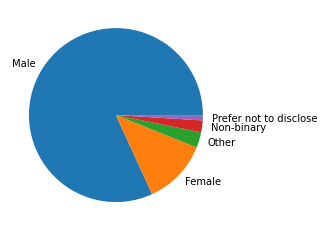

In [245]:
# gender proportion - pie chart
pie_gender = df_survey['gender'].value_counts()

plt.pie(pie_gender, labels=pie_gender.index);

In [ ]:
# top 5 countries

In [ ]:
# top 10 states (USA)

In [ ]:
# race distribution

In [ ]:
# age - histogram

### Kitchen Practices

In [232]:
# heat map - often wash:  plates, thermometer, cutting board, utensils ... after handling meat

# construct df with `value_counts` for the different surfaces/items
all_counts = []
for item in ['often_different_plates', 'often_thermometer', 'often_not_wash_utensils', 'often_not_wash_cutting_board']:
    all_counts.append(df_survey[item].value_counts())

display(all_counts)

[Always                 10741
 Usually                 1790
 Sometimes                196
 About Half the time      185
 Seldom                   137
 Never                     95
 Name: often_different_plates, dtype: int64,
 Never                  4621
 Usually                2351
 Seldom                 1865
 Sometimes              1611
 About Half the time    1414
 Always                 1275
 Name: often_thermometer, dtype: int64,
 Never                  7603
 Seldom                 2631
 Sometimes              1068
 Usually                 717
 About Half the time     674
 Always                  437
 Name: often_not_wash_utensils, dtype: int64,
 Never                  10356
 Seldom                  1420
 Sometimes                424
 Always                   329
 Usually                  312
 About Half the time      292
 Name: often_not_wash_cutting_board, dtype: int64]

In [233]:
items = pd.concat(all_counts, keys=['Use Different Plates', 'Use Thermometer', 'Not Wash Utensils', 'Not Wash Cutting Board'], axis=1)
items = items.fillna(0)
items

,Use Different Plates,Use Thermometer,Not Wash Utensils,Not Wash Cutting Board
Always,10741,1275,437,329
Usually,1790,2351,717,312
Sometimes,196,1611,1068,424
About Half the time,185,1414,674,292
Seldom,137,1865,2631,1420
Never,95,4621,7603,10356


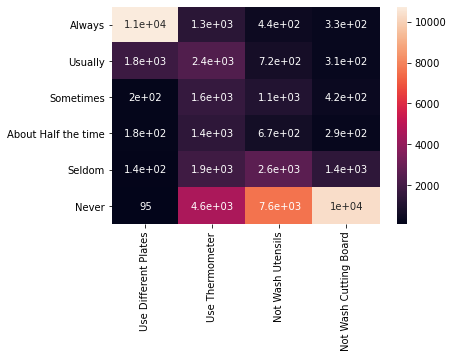

In [237]:
sns.heatmap(items, annot=True);

In [ ]:
# wash or not wash meats - stacked bar chart

### Safety Practices

In [ ]:
# home safety vs. commercial kitchen

In [ ]:
# clean up analysis